# Pfizer Tweets
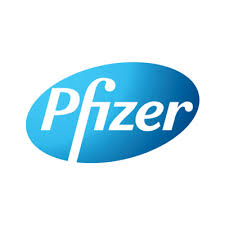

Pfizer Inc. is an American multinational pharmaceutical corporation. One of the world's largest pharmaceutical companies, it is ranked 64 on the 2020 Fortune 500 list of the largest United States corporations by total revenue .

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import missingno as ms
import textblob
import datetime as dt
import plotly
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
import re
plotly.offline.init_notebook_mode (connected = True)
!python -m textblob.download_corpora

# Importing Data

In [ ]:

data=pd.read_csv('../input/pfizer-vaccine-tweets/vaccination_tweets.csv')

# Having A Look At The Data

In [ ]:
data.head()

# Looking For Missing Values

In [ ]:
ms.bar(data,color='Red')

### We can see most of the values have the same amount of missing values in the whole dataset

# Let's Check Relation Between The Missing Data

In [ ]:
ms.heatmap(data)

### Well we can clearly see that if there is no user description there is a high chance that there is not going to be information about the user location too 

# When did the hype of pfizer started??

In [ ]:
hist=px.histogram(data_frame=data,x='date',color='user_verified',marginal="rug")
hist.update_xaxes(showgrid=False)
hist.update_yaxes(showgrid=False)
hist.show()

It has been seen that most of the tweets on pfizer were increasing since dec12 and took a sudden decrease on dec 20 and a sudden increase on dec22-23. Pfizer have been on twitter pretty much after that

# 10 Top Hashtags

In [ ]:
dic={}
for i in data['hashtags'].dropna().values:
    if i==np.nan:
        continue
    else:
        for j in i.strip('][').split(', ') :
            if j in dic:
                dic[j]+=1
            else:
                dic[j]=1
dic=dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))

In [ ]:
fig_bar=px.bar(x=list(dic.keys())[:10],y=list(dic.values())[:10],color=list(dic.keys())[:10],labels={'x':'Hashtag (#)','y':'Counts'})
fig_bar.add_layout_image(
        dict(
            source="https://media.sproutsocial.com/uploads/2017/05/Twitter-Hashtags.png",
            xref="x",
            yref="y",
            x=-0.5,
            y=1300,
            sizex=10,
            sizey=1300,
            opacity = 0.2,
            sizing="stretch",
            layer="below")
)
fig_bar.show()

### Highest hashtags were for #PfizerBioNTech followed by #COVID19 and #Vaccine since the world is looking for a solution to this pandemic more and more people wants to talk about the vaccine Pfizer which gives 95% chance of recovery :)

# Where were the most tweets made from 

In [ ]:
def getting_user_location(name):
    x=data[name].dropna().values
    dic={}
    for i in x:
        if i==np.nan:
            continue
        else:
            if i.split(',')[-1].replace(' ','') in dic:
                dic[i.split(',')[-1].replace(' ','')]+=1
            else:
                dic[i.split(',')[-1].replace(' ','')]=1
    dic=dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))
    return dic
            

In [ ]:
# Replacing the country names
x=getting_user_location('user_location')
x['Canada']+=x['CA']
del x['CA']
x['Canada']+=x['Ontario']
del x['Ontario']
x['UnitedKingdom']+=x['Watford']
del x['Watford']
x['USA']+=x['TX']
del x['TX']
x['UnitedKingdom']+=x['UK']
del x['UK']
del x['Email:talksavailable@gmail.com']
x=dict(sorted(x.items(), key=lambda item: item[1],reverse=True))

In [ ]:
y_ax=list(x.keys())[:10]
x_ax=list(x.values())[:10]

In [ ]:
location=px.bar(x=x_ax,y=y_ax,color=y_ax,range_x=(0,150),labels={'x':'Counts','y':'Country Names'},template='plotly_dark')
# India
location.add_layout_image(
        dict(
            source='https://upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/1200px-Flag_of_India.svg.png',
            xref="x",
            yref="y",
            x=130,
            y=0.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
#USA
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATYAAACjCAMAAAA3vsLfAAAAq1BMVEX///+yIjQ8O26vDSbXmqCzGjCyIDKwESnQipC6PkywFSvJeIDBXGY6OW03N2xkVn4xMGguPXIdG1+5IC5LSngvLmcpKGRfXoUxL2glJGLx8fT4+PoiIGFwb5GwsMF6eZiQj6jCws/T09xRUHzi4ujLy9YYFl0DAFeoqLu4uMdYV4CBgJ1DQnNkY4hNTXnc3OScnLEOC1nn5+uLi6V/fpwTEVu2CR+goLRqao0RJVxPAAAJy0lEQVR4nO2dfZOiOhbGz3Lv7t59STbtkCgvIiDYgtraaI9+/0+2RIKdYO+WfapuWWHy/OFMp3mmKr8K8nA4YcB7nl5+/MVWgcOGkcOGkoaNfjEzQr4Y/OpAjHsM2AhL+P0UF4t7HDxhdzhQ7jFgo3MQdzR4lt3RIALmdzRQbuuxERG8V7CbBExHEQSvUfQaBDqkWTDZQfUe6JCwbtuxET9vigjCIkw+Z04XTVMAFE2jnWosaQ+CqGj2/o0b2m07No/MSpA6BNrSYNNQjoVTfREF6fXAcqavNqTbemye95G101kITxeNI4AoNr/IxLw9MFsZY0j3CLBNQmhgcDWkU4gimJoT5wmEEE5MbDi3/djoDk6rKlJnmToBedVst03FjcEgqiYL2HU0VDBDul9+/maremybN+aJU32dHdkqGqmgVKSKUDdI6k3gMX9Du7FuEOf2+O/Wqj9JKek/2i+gTK0NGUyJOstI1n11XX9Wg+x4pHi3NwF75d2LweY+z26A3R0oylLcDT7sHhU2GqwWkL3Gxvc7j18zWKyMPEtE/AHwERt3Bw+7R4aNrdW4nme3uRpca3l23v8L2q3Ww+6xYfNEF1MPsZ5n41SOhVP9lKT8GnLLGcW4x4bN49dEOgxmMs/OzWBGVjLPrsw7+IfdY8MmMmiXUWwOxu2ygmxwGzCHohhWQx52jwabSlizaDPxm5OZZ0+hP9lE6kZUgRJlFgRVfy39rnss2Gh3H0TqmrXfW90iIm9vXZ6dM+qxusuz6kCPzIW8ySQ490iwEX8vPpdIn2cPh+7qd42yavGI/jJJtVX2ffcYsMnbICCU6l9U7Y/xfh9TagSz9keQt02eMYhyW4/tbTHf7eF8mWs1RbJbXC4Al8ti9zlzuphfzrDfzRdvnzCwbuux3WKqPnF/341p0bWduDpQK+Si3S8//mqr1EnaxdSSGadZfJBTPBiVRsZkyA13RppAul9+/M1W9ZeEWM5nY979ECEnPngixTaS0DCYodz2lyk9AU0KuZlI2RGyCo4mDZHDoYFBdMW57cdG00yIZbNVP3V/8DKN42PJjcFtUwuRpWaexbntx0aWQsYDv5viSS0Rv/2T+WrxqOTvy/Qgll2xdjolePcIsHW1/r7g39R0OEjrRn+c1w2ytaoFodxjwHYTmwkfzvFM7/MgbBafwRcz47H7jK2KZsWMwtHD7pFho4f1IYPmcF7rj93X5/aLPGt/9YmIztvBNmCc11oN5GH32LDdYupCz7MqphZadPVY0kdXgnCPDFsbU88y21PjjGJM4ljHxrzFTsLYGcnscffIsHmzVE58mGflxNOZCdi73pyZMB52S2w//26r7rEFRTjNBjRaQtk0LALjQHaA4xEODOeW/8Af1uq+urvMOIvTvlLWV87SmIpsadRneVZzXmcc5/ZGUAG5Tu6s1o3koL7m6VxdJglTv9APlLfu/bfY993jwEZ30f0Tdl5V9y25ItrdP3bHuK3HRoRYJVAHwsizQryH4bsQRp4VQQ3JSphNqDi37diIX+ZlBEWZ64/dF/u8BCjzvd5Gut6XBUTt4XqeRbptx+ZRFVMTri2imYqpenQlvAu5ha8tIqzbemweWV0LjYERHBiVj93N6EqCa6FxYiYMnNt+bF7cQATrQRvpUh6wHLSRrtsDm2GeRbntx0ZrSIMyNBMpT6K6jgYtuUFYihRq84Efzj0CbOmUkzit1WnWl9MYpUwvqcnH7oeY8OnRxIZz24+tC/QqpvJKPRNmtw+PUJXBrtFVxX+6UY2TKPcYsBmnF9xvMaML+CK6Zl80oT7sHhU2Fq8uso3UzLOyjfSyis1NVfFrFL3Hxqaqh91SL/+wVl80oUZtcAghNzZVtQMQhWYTatgOQPthNqE+5u6w2f94+SaxiOQiTMz1co2p0cloQu1CbuEzjLvD9uxqI1r/qwl1NcizX7SR0onMsxOKc48OWwV7iAZ5tiW0h0E9g14gDOEywPaoezTY1AoR0eFjOmjJpXPYfRz62lC/qSrLZzzPOM49FmxUPWmvL6JNVipEbLsGBXpqsxbfqU1Vyz61BYTEfXL7rnsk2Mg217ZFqdI1S1NV3r5+qDbSvN+M9nkgwj0GbISwI1BqvIGCEBLkebuizEFK4cjMV1Ug3dZj86fLbQ6pv5xqj4rreukD+Mu61ganSz+FfLuc+p8wsG7bsRGSqXsGrR2N1E031mg02lXVKdNgYN22Y/O84BpTzehKg2tMrYynAbNryI1ORpEI6X75+U9bdStTXl8SMGgj7V4SMHjsLovd2bBMiXKzf1mr/pIQQJTAoJ7BTpDncDJpiBKSCMz6N9JtfwWEHvc02IXqhLq1ka4nk/OgjZSGl4Dtj2YTKs5tPzYybVcA9ZZqj5SaZN3Omddqwmof1bI9jASq+VRdJnHuEWBTtzzdZ1C8aT+qv76p1hf9QHY+M7x7DNhuopRt4XC/qeoAW2YMUkonRTGhg8EH3SPDRjfHTQXFaZPqeTbdnAqo2l9p/aaXdLMB2GxSrQbysHt02LrN7gCp3kaadmOh8eodFXJLnHtc2NqYWrWjjW++ksKXmd+Mrl5wkv5NgHOPDFt3B5QP86x8KcVgIxBh0j944eLD7rFhC/awyIcviWGwX8B+0ISawvlsnI7fcY8G2237NmWT9bCNNJkwmuubvWXinwtxMfPs4+6xYGPduiFb2W7FVV32oi6TWy7brLoCI+sXmCxJ9nu6v+8eB7b2Iqgn0k48MVpfVJ7tL4n6pqrvuz3v5d/WSjWhcj5Zw1Jwo/TD+UfTfHBuPHbnYgnrCdc7ALFu2zd9E7+qkhDyKjvrj92zqk0TVZXpbaTnrMohTKpKf+yOdFtfpuxjaqmfY31MNbav0O6lp0Z0xbqtx+bRa7RKzbzFfVloNKOrd309Vm6+4BTpth+bFxftfAYbgYgvl8ZgXx6TL1wohnkW5bYfWzvHhBaDNlK2hvl82CcUNwVZD2gg3fZjo+lC0HhdGzRYtWXMS4yJkzqJqZingyZUlNt+bEYb6efMiWob1Wc+827x/5Mbyj0CbM+Qw/bLYaPPk813Cf95nupn31ni9efWCZycnJycnJycnJycnJyc/o+e3XNtp+DZHf52Cp5d8LNTDhtKDhtKDhtKDhtKDhtKDhtKDhtKDhtK8Oy3BdkpePa7qezUsysJTk5OTk5OTk5OTk5OTr+wnv0/RtkpePb/T2anXJkSJYcNJYcNJYcNJYcNJYcNJYcNJYcNJYcNJfd4GSV49vZpO/XsSoKTk5OTk5OTk5OTk5PTL6zfnRCC35wQcmVKlBw2lBw2lBw2lBw2lBw2lBw2lBw2lBw2lBw2lBw2lP4LXeRqcnzlN5MAAAAASUVORK5CYII=',
            xref="x",
            yref="y",
            x=118,
            y=1.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
# England
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASIAAACuCAMAAAClZfCTAAAAFVBMVEX////OESTMAAPtvb/uwcPNABXhjZHwlm9FAAABiUlEQVR4nO3asQ3DMBAEQVqk1H/JdgcTPgTvVHDY+Naata8PXHt44rQSUYmoRFQiKhGViEpEJaISUYmoRFQiKhGViEpEJaISUYmoRFQiKhGViEpEJaISUYmoRFQiKhGViEpEJaISUYmoRFQiKhGViEpEJaISUYmoRFQiKhGViEpEJaISUYmoRFQiKhGViEpEJaISUYmoRFQiKhGViEpEJaISUYmoRHSc6Exv3KPOcyvR/ZzZjeuaxUK/RsMTlyf+uxJRiahEVCIqEZWISkQlohJRiahEVCIqEZWISkQlohJRiahEVCIqEZWISkQlohJRiahEVCIqEZWISkRdsKgjH01fLd9wBx3WqZhKRCWiElGJqERUIioRlYhKRCWiElGJqERUIioRlYhKRCWiElGJqERUIioRlYhKRCWiElGJqERUIioRlYhKRCWiElGJqERUIioRlYhKRCWiElGJqERUIioRlYhKRCWiElGJqERUIioRlYhKRCWiElGJqERUIioRlYhKRCWiFyT6AlXQRZ39U6PdAAAAAElFTkSuQmCC',  xref="x",
            yref="y",
            x=100,
            y=4.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
# Canada
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT4AAACfCAMAAABX0UX9AAAAhFBMVEXIEC7///8BIWnFABjrvcEAHmgAAFnICSvKKD3HACalqb0AAGAABWHGACDEAACiqL/02NvUWWfehpD88vPEAA3eh5HEAAcAHGkAGGcAF2fTVGPUXGr99fbFABPGABkAEWUAAE7txcido7ve4OiRmLP29/rgkZry0tbPPlH56evadYHWYm+GvczdAAAG3ElEQVR4nO2dfXfTOgyHDaOMtex9K2NsF9bLGC/f//vdctsuiSslsvXmnqPfXzucUCtPbFmxHDn9uXgzpefVbDF7q6eP866tD8dpRMcfuivnHxVNmi3uVs+vTT38gIw5Wd6/pJOb+2mAb+ZvFQE2h2/dW867hq6vHk8heJdrbq9/OAJsDF8O7x8I3rbT9UhOAvykBLApfLPF5x68B6Tn7Ubs7h/OSENYxwc2hG/t8/o97/YGgtdjBRAd07nGEG4GH93n7eFLxElEAWAj+DJ4t0cjPg/AR/WB59JDuAl8s8Un8oSB4CMP4c+iABvAN1t87U8Ykz4PwUedRESHsDu+3OeB8MCRCdhoHkg748uG7e30hNHDd1pw8VBiPdAVHy1Ixnikh4Kummt+JwLQEV9ZkAzgK3GU+xKZhd3w5cMW7khjHNKGOm2aBgHyh7ATvvIgGcFHDRKVALrgqwmSUXy19LcAeUPYAd/w3fbhCoRHiIFT92fN2H+9F04gbY4vg8fw/ekra+bpxBjCxvjqg+Rc87tUsjg48WO1AE3x5T6v3mX9vd8k+YOVPdAQn3RnSdCPLuufSI0PNMOXLwyAHYW2cLztKAn+4XpnWjGEjfDlQXJ9J+lWnBLy45Y+0ASfRJC8hde7v4Q2gASSCj7QAJ/WBJnGGmHMSiVZOXV8UkHyfsdIYw1NZ5pGGqIDVManeU9pvDHJJ+WDT3dE7eHT8xMe+LT9OYBPa5ayx6cfTYD4dGIka3wWsSyCTyNCt8Vn8yaF4jP0gQr4rN7jR/BJr07Y4bOb/Ebxia6N4XGgMD5u9qzT9MQ3gW/PGI2snCg+UpBMW0EnpGEn8RkE0oL4BEMuUv6GgE8qK4UCFMOnbGctPuWnKoRvGKva5K6J+CQy8q/3nfsUEXxyQXJJ2pWMT3FGE8AnmT0rWasswKcWT7Hx+SW7ivDx9sKhhjLxeaZaC/GpDBMWvsznwS5FbcdsMT7RlYyNk2bgo60M6e3XrsAnvo5Wjc86SBbCJ7mKuwa4qMO3yGzw2KNYiU80kF6savCtFtY5GUl8khmsf2vw9f4Tp23ed3oMfJKBdAW+Dp7OMpo+PsmYqxYf4neNvlFm4pP0gTX4XPYj9vG95+vb++/dd//XV2egfj7J4/v1G26LAO/5+9psvtJkQ7aq8H2eCnwsBT6WAh9LgY+lwMdS4GMp8LEU+FgKfCyld03paQrfk7eFQ6WjtjRKb83P275M49aGQqFQKBQKhUKhUCgUCoVCoVAoFAqFQqFQKBQKhUKhQ5f3HqVMh7bDynuH3FAHt7/Pe39mpkPbXeptQKbAx1LgYynwsRT4WAp8LAU+lgIfS4GPpUPDJ1BOYlBJA9PFJVz14vevwWUi+F5+wm1dXb9eIlVJQ7aOCw7v5mSfxulR74YE8a3b+7KE2nvstydSx8UE3hcQ3uMePMHBS3lgzlWEhjWscHhgT7gB4In6votLQg/0q2E1rKCG38QZdBPL/k1wK6hx2naqoEb1edM9QKJ+H9o+oec71O+TmzCkqkdybDCuHjmsXYoaTp39hGqXsgDa1S4dVs7FjQbhQX5HrHIubgvoA4dD2KZyLvWJTxusUbcZtQceCUvuEGZVDcfhFfkb0arhhQCZgTSjZr2YocI161G7FCaR6hMTCuGNhQriJybgAEGX8gi6FFl8ck7a4ryOQvuWtbNw1WkxuHFgz5sKEVROi0FtJLgW4dNilH2L4FlFChMbFx/x3bb+qaqdlIUDrBolNfiIEwbHpyie08axV+CcNrmFAa9TAlGbRRYTCs6oxOExFyaVz6gsBFgUSJNPSFU0Qv2EVNR29iRCPJ+3EN6y6FXI4HxeHCAhTi0/n9d0JcPkdGj8HjgdgHA2Od6wUPxkdDY5eh8M9wPgY8GrWcFQw6ffEfbwsYLkuhyCIj7t0CvljUkFnef0FKAqPt17SsOGDIJkc3yaIyr1G3FadFTHp+fPU9eA9izliU+rc6Tdj+vHSL74dGLZVPJkeBG6Nz6NN6nkmWixxif/Hp8803z2+KRXkRKjO0tttDHFJxqe3RH2NpNWZqu2OPjgkwykJ/HJ5QXawSeXv5nAp7u9yw+flA8cxSebE20Ln0xWbgSfdEa+NXwSgTSKT34/SHv4+Fk5BJ+Jz9vJER8zkD4F8Vl9VLKVKz7e1g4An9ZOTFTO+Fjv/KSLRPYBo3LHx1hxyi/Q24WOqgF81eudxfAkh+1GTeCrDKRHyG7giX2Bg6oRfFWBdPeP2t9/oWoGX8ViAkC0gyf69SGqhvAVB9IbeBbfvqJqCl/hN8rmQfK+GsNXNIm83EPw0vGP3nf/Kx2ft1Nz+P73gStCfYY//wEigYBdwuNHrgAAAABJRU5ErkJggg==', xref="x",
            yref="y",
            x=102,
            y=3.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
# UK
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT4AAACfCAMAAABX0UX9AAAAkFBMVEXVKx7////TGADrq6nSAADVKRvUJhfUIhLTDwD55eTUIA/UHQrTGgDUJBXUGwXUHw7fbGbtsq/99/f77ez219Xut7Tzzcvlj4vifnndYFn109HbVEzom5fqpaH44eDhdnHxxcPaTEPZQzncWVHYOzDli4b98/PWMSTZSD/nlpLjg37gcmzeZmDmj4rXPDLpoJ3i5xrcAAAHrklEQVR4nO2d63qqOhCGSUwgAoLiuZ5bq7a17f3f3Ta1KmqAkKTulcP3a3WpQ3ifgQmTYeJ5SgUb4J9WA6o9X8Vy+KTk8EnJ4ZOSwyclh09KDp+UHD4pOXxScvik5PBJyeGTksMnJdX4mk219izDNxqptWcXvi5CXaUG7cI3SlO17mcVvi7yPLXuZxW+Rep56UKlRZvwNRE1iVQGX5vwLUJqMvxQaNIifEfnU+t+FuH7CI82VbqfPfjm6GQUzZUZtQdfOzgZDdrKjFqD7+J8Kt3PGnz74GI12Kuyagu+HsqbRT1FZm3BNw7yZoOxIrOG4rv1rmvnY7ifoDsaim8xvs4MvLSu7bZerj7ujgWfhA3F10HoM7v8+YRuDaOn3LeHCHUcvpx6xIuDC5Jb57tyv34LesRdvHllxPMwWf1CuXe+g/sNfkGvCPY8khXbshAf2PmHX/voY0P/mNw538H9JvSTzQLRz/yd4GFMxTc65gdSNM3AlLBMkynIpij9+XcomsI3Fd/5vGIIE7btBMJY2WH+TQmf1xPT44pEnqotWoUvY0SLYiHByGEsPrDG/EfBa9GjGIvvI6i2flIgnH82Ft+sxonBmcN3o0GN2EEGDt+NujVih3jlgbH4QMQdO3AkfBBz8bW5Y4fE0pG5+KYFDxv3SqYO352W3LGDLB2+O3X58YnXrJmLD/icsQP74scwGN+YkeVjqSWx7GYSvptnh7eI7xjRW6kZW/ANbtZ7eGPHTeTooBrPIAbhGweon/+7yfnccV3v10d11tDNwUdpoStH4osdGOd/s0S16ifNwfca0cW1/ILj/fIkS1cr5j267Ba9Go1vwzqRLKG+hkmu9mzIFTui4eUXc/JjJGEmn1mH1RFfB7W/B7cn0zmeCI4vc+A+17nByw2zG/vso24GszazEEFHfBkJYkK2o0Yv5yXr45l7Pj6DnXPFjkut5MY72cgl77NeZ7QmJA6YK+k64juWOuIQknj12j/e5y+zlNb6fJ583ncG9XW+V/7OZZr94SoiMKVXNLukUkt8l6vSjyDyx9NlI71E2fBcMjDxq4/gT07f3oXn/8RhYzkd+whG5+gN+6yRaInvehUStxIC83OU6ETkPa0+Qvp+Yp0PNBiSpHU172GvZWqJr+pxNvm90DocJwd/I8K+PD1Y8GCsJ74qLvBY7djjeGz7nSkuqiyyCwD1xLepiqnkeElyhF7088XXKtCIOdnUFB+z5OxKhKZRmjzeRyP3W9UXWxP2ODTFVz1sNOzOdzyRdzfvDiu9VHwc/6uKhs2RiY8I4aB34EdI9cNdUT5fU3xcUzp18guuXW3x1SlhUTCMogy0rvh4c6FqVJgB1BUfWD3w6vVXRaPQFt93XP1rVYq/jcP3yKu3OHuvLT7w/LCr138uHIS++PhLgGSVFF67GuNbPmzksLiESF98o7D652pU8s6RrviaVRkmpaNYmDXv67XRw3yPKkR79hurOuIbvKAaL22oUYAmrNIX/fD11oSz8kytWmR774H64QNvqMb7VuqE0dv9WDTEB5boodmqo3zEmr7oiA80txwrkGqVbpnBV0t8AIxrva4rL1JQ86cpPvD52HxfUcmarvhA/3EBBCNmgYbW+MA8eNDkLwiK+9Xpiw9kk4eMHU5K3tTXGB8A7w+4AaL3shFojQ90/voGiFH5APTGB3rxn94AW7CiQ4nm+MBm9YcnEO/YhUHm4ANg8WczaFLd1E9/fGD2NzdAjIqXOEzCBwZ/kcFqcbXXMAEf6H5xvjzJr+iL6x1pI/AB0FZ8AySc3SEMwac2h8rMjBqNDyz5iiF55PP3hjAGn7ocarrlb2lvDj5VOVT4UqOZn0n4wKuCFEJhZtR8fKAvewMsyYxagA/MQ6kUQpDWbH9tGD6QTST4Bau6PUxNwwfAVngCKNDC1Dx8PG+hspWWJpYtwcfzJhZbAq3XjcPH18CArfpbQBmH702i5DnhfdQ1Fx9v2zmW6reiMw1fSa96fPePO9XuXW8avhEr7vohJAiujwW9IVpDRGDIijC19442DR+8di0/SAgiq9Fs0D1MqT8O98Xk4zA17g5mo9XhgyS4hohh9RFMxnfphoNbESTkqz1d5sLps59/Q2i+nLafIYHRpeVI3S6whuH76S/kpwdw+OWz37t9Bpsmd28IZb3+5wsmBKbUEetuv2gWvg2KCUHPo8aAvdAzi2P2i83dp8b7ihwgFnTMsANfZz9dlvUuPHhfWYvr5vJ7X2/DNrPwVWkY5bv1KZBd+EZp7alJuezC1w4U7gxNZRe+cUumxzVDduGb+IUdWcRkF76dL7ydIlt24Vtj8T3FmLILH8bYU2rQKnwZTRmIbgjIlF34iPhOvGxZhY82naz5UFshq/A16/Xz55BV+GgrWNFdyNmyCh9dCBHeipcpq/DRXLT4fpQs2YdPfFM2hqzCR7tlF/SvFpRV+GjDU/G9eFmyCh/tWSexISVDVuGju++ozdZbhY+W/gkU8ZXIKnx0u3fxbdxZsgof3eZDbbbeKny0U7vabL1V+Giz3ZI2uAKyCt82DYJ0q9KiVfja+4OULvRahU+9HD4pOXxScvik5PBJyeGTksMnJYdPSg6flBw+KTl8UnL4pKQa33+mUo7SKNs+0AAAAABJRU5ErkJggg==',        xref="x",
            yref="y",
            x=101,
            y=2.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
#UAE
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT4AAACfCAMAAABX0UX9AAAAKlBMVEUAAAD/AAD///8Acy8AcSn8//78/PylAAAAdjD/paWlSx+jSRoAdCv9o6PiyikgAAABXElEQVR4nO3QSQHDMBAAMfdI05M/3YIY/1aCoHXZ6/28TbL0FfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfcnuvs/3Psnuvtcxyva+6yj6En2JvkRfoi/Rl+hL9CX6En2JvkRfoi/Rl+hL9CX6En2JvkRfoi/Rl+hL9CX6En2JvkRfoi/Rl+hL9CX6En2JvkRfoi/Rl+hL9CX6En2JvkRfoi/Rl+hL9CX6En3J7r7f8Zhkd9+5ZtGX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfoSfYm+RF+iL9GX6Ev0JfqKP7tJNWHaZ7e0AAAAAElFTkSuQmCC',   xref="x",
            yref="y",
            x=68,
            y=5.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
# Malaysia
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP8AAACACAMAAADzok/sAAAAulBMVEX////MAAAAAGb/zADwtrbibW3TJCT429vaSEjpkpKvAA5mADN/f7ICAmX6yALmuAqZeinfsg1HOUoOC2AoIFY1KlHMoxQJB2LvvwbXrBAdF1p8YzTFnheLby70wwSEajEsI1RpVDy0kB5aSEIiG1gYE1ybfCh3Xza6lRxVREQ6Lk9AM0xENkuOci1hTj+ggCY8ME6qiCJ8baBuWDptJFdNPkcvJlN0SXxSQkVzXDgVEV6vjCBfTEDBEhmV1nrsAAAFTUlEQVR4nO2aibKqOBCGHTL7DCDIvqi4gbuOo3Nc5v1fawJI5Fwl5Na9NQnSf5WCEqv8knSn052OxFd//MBXHeAHfuAHfuAHfuAHfqpkM1qPAlezgn04Nr4H/1+/8NVX8PfG1z4qS+3q8rfy/9nhLNY/Oll/hs+lxb1W8E9nSonaGQ02umku9E2YaLH9/vyH0tir4aI86+XlYVj++Ib80+RBb82fCe3SV4v34zfVx9iP6xoP3o5ff8z9bZWzs8laOJreb+RhRduG8a8IvnKrbjUoTEDb3W/O06q2jeI3Cb5DM+3Iz6+2sslvjIQJX/r7V76q4Z9qBN+ktlPyxwbKHYAcxGz8Yse/MvH8yo7aUAqsLAw4omv2MUaM0bHY/Afi+jY1HHE+8GdkpZeh4rLhi83vEePfVrQgTt5AmQV0UR+/yxYi66BHD5CF5t+Sdb8KwtsWPeAiF1sAthdPknyE7t7CHtREDCLzD0nMX73yGeo675sBQiFe/hBaSScFqfl6ONfOdHyh+WcFvkuJ6k+Oc0gfm7jdzsZvEZ79qJv1TYJqw0GB+XvE+uc0gmUfWWlogKNkN+2EEM9+pOOfd5W8G5rKvyHWT9/UHbGZbKfY9eEOSF/4o2PLkYO/rd8N/vMbX1H4ydof1jCMcZt+fCwlCPY7bANoxLAZFjf+tYn3q93TRmkrrcSf3QcsiRFx+Zck8q0fRh89y2LKjInLHxcgo9fP7eNYP3n3MQ6f8N1L9kC+DJcfN6+B/CT4qVrD5NUem0hfs0bbdax9yR8OutfATVMnVkSZCeLyBwUJZdvfi6wXM78sp0vdNwrMT0Z0SQUwu041fTKu84Hi8pOsH30AsSOYJy/h1XBS80uh+cmwMiTyzCfzR8qZKRUubvzDPP7YBF6Vhuh+r5C48S+j/V/ObqX51zk/ofmJ/6fs4PMlkCY3vjSUn6z/flWLySCzEccNrtsnB7DdJ66ado6yX1E8gbj8JKa9vn5uH/1ovhxOM7joaeCTbOXrGYvjJj5Ux3/i8usFiVo9eoXGL2Y+y+5PZP4eITnVQaQZAFQOg7J7ht2/yPwPB1jpAO5apsvf7KPEP9uknqE++yM0P0n+a3QEE492YGZbQLV4yb21Ur1zKkng+teULG06jcBQ87I4XgHUFW68ThNhuyz7ieqyvyLHv5K0L/gDSiNPU7IM+BC3+0h9xsHW7imzo1ZbNhKaf4HqJ8DUHeWVPj8rEqlp21VhMrbfp6aOBeeXrgW/W7WN7e2LrrGyIhH2mZO0ClZsmrwt1XYE538UgKpSwLuiY7x8ksyQglc9bAFkzTDpmyCh+dOiFosLlNLFYpZeYpQVfnd5GZhBYvPbZG/n1NTzEy0b5w80yj6uUXXI2yB+ySBRnUYF6imr7DpE6+xqu4e34Jd04gI0Wjbrdo/1bBTlNwvG8z/Cn3++PYJ6SiIkLLyctrrfDNgOBgsc/961ITNA8at2NDbJ8yTe01cN55eOj+yeVXMKCjs+JupG8UvDUobv+mpYS9Ni9eJx0/kle13K8lnR55Odk1u5S772MHwj+CXp9KnEYXU3S+PSuxiraGZ12Q66NptfkpYj9EL9LkON5y348UT3vyh2KglLheNt+LGm8/DqqoriqMHe178ZvnH831+ix7/AD/zAD/zAD/zA/4b8v/PVvz/zVYdz/MlbwN9uAX+7BfztVuv5f2y3eIefIBAIBAKBOOindqv18S/vP8BZwN9uAX+7BfztVuvjHxAIBAKBQO0T7wIUZ7U+/uX9BzgL+Nst4G+3gL/d6nA+f8xbvMNPEAgEAoFAoP9b/wEq9vZ9djdZbwAAAABJRU5ErkJggg==',     xref="x",
            yref="y",
            x=36,
            y=6.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
# FL
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASIAAACuCAMAAAClZfCTAAABGlBMVEXOEScBK38AAAAALYTYDhz/2D3/2z7/4D//3T7JqS//3j/tyDj/4kD40jvwyzn+1z3hvjXQrzAAJ4LCoyzoxDfcuTSkiycAIoPqxjhyYRvMqy/10DsAJIJuXRq4nCziwDZkVBerkSl9ah4AGoKGcSCSfCNQRBOchCUAG1oADngAHYBHR1f/5juzmCkAAGs3Lw1HPBEaFgYAEjUBI2gAFT09QFiXgzl2akk6PlwAEXMAE4EAHndvZE1JR1CGdUVzZDNEQUcAIGwiMmWQfDyjjDYSKGR8bUNmXU1qXjpfVjwUJVlMRjmeiDgAEVsvKAtaTBVZVFAxOWARDgMeGQc5OkiJdjMxNU8AFWk6MABfUAUAABsAGUsABhAAG1FOpVkIAAAH3ElEQVR4nO2cC1fbRhaAw3jnIWn0GMuSsWTrZckCYsd2KMlSAikhS5ImixtoN92m+f9/Y0cGk6ZJPS4hLEfc73BsyZLPGX1n7p070ph7a4CCe//vBtx+QJESUKQEFCkBRUpAkRJQpAQUKQFFSkCRElCkBBQpAUVKQJGSr1HUuLZW3Gq+QlFzo3l97bjFXF1Rc8fcvhP96OqK+gF/1L7Gltxarq6o+5j/805E2lUVdfvtXf/7dv8OSLqior3HwZMnYv8g2N+73vbcQq6mqPuUDnEwdNkQ/1D7fnTFXrS1f3C4424/O3rWvd723EKumoua3a2D4f1u+w4M+1cf0TYNHvWvsSW3lq+oiw6MfaiLltHdiVpvntU+V699RS7atxwa4F3IRZds9RvtfrfRXgxg7TeBTazg1WK/25WnNJv9GobeKoqam/295+6/jsXj3eMX7d3dZqO51hfEWLf4UVtud3e39o5fbD4S+/vBwdZm3XrWCoqaO7H2klMXM7sY8leBsX94f6/9SnieED92t+/vHofPj4a8w1ns6PS1Iw7r5UipqLn7IKI8ZbSIqedzGlHddYbRj29cTvHo6N+tYWQxPeK8Y9KRS0N58sGDWnUklaLmDrZLbk97aS8b9WZRjky90Fm8TslJOaA8sJnhcwf56SwbdTrRONFJQVt1upOkUtR/RKk/jkxGeQW2Y7cYl/EgpizhPc5HedyZ+K5hk/lxSowUCcZf1ChtKxR1374MrcKkuhWVee6PAseULkI3n6SDaYk65aQQ5pDi0NPS6gTXpNQoTOd1jSqm5YqaP1GeTBgXAzTolUXh58kYDbLI4wKhaJghRLBIOxM0SHK/KEp5tBfzEJVD/Kw2obZcUfuIU9+g2SSNw8D2NCsObFGcoDnj0en5xsD3TK1lBAIL0yvPUu56bLhfm260XFF3QwsK7k+GgWNopnANx7U8YXfmZnxy/l7QwLNcp6UJU7O8gCFBO97owd1Q1HxrWWNhjyOqeR8VaaFXVGq0YVm9jQTW/qBIY/6A+x3Tq011tFRR+0DWQUTkmv6pIiFy6eZ0LioSwaeKiJiYXp0ibamixrNWmPA0df+sSHOkHDH05asZ/FlRkDlmBwd3oxc19vx08iVFrlkFGpeBNtC1Lyiyz9yj2lRG6kCjWvm5IlsOZidVKhrQzxUloSnoHQm07hNOc2p0PstFbqsKsao4Ovs80MRAltiU1eY55PJBv/9yhGyaXIxosi5a5KKRVGRXipC3UCTrIvt8RMtpgNyfa/NoZLmi3RaNA+pnXCoSIklSRzsf0SZSziytXrPzEU3zyqQXC3mUDjw6Mmm0dTMX8O1ZrugdZrig1gnXHGPWiwJ/lptVXeQjObMlmIT+KXLndVGSpMFokIdeYJ5SmlE93r2ZC/j2KCYgL7TkzOKzLBCnIy5n+6ycyDlINO1hbnnrrZCH40HAhHfmUkoZzQeeOyipQIW7U5dUpBjR3h0J09ZSTQZUj5PQjUzbRUWJBhy7vbL0/YjaUxR1UMsKtQgTvZq+Cd8jYXBcmxnIMkV7T7FOZDiRSF64YcdlMdLK9WonNk1feF4cF+H8oLCyyE1zgwVyduvp1Xeo9bomjpYpar7SiW4RebkCnWE7a4WmHflhicbcS23CC0pwHmKEAhG4toWdTI/RmcXkNyydmHUJtaWB1v/FzHM3FTaPprxwbMNnzAppL9dljmbmhDJbuHzs03Wb0Uy3vNREMbXiPCpz8lNdyuvl6fqBY6xbRZp6NAtlxcMmemhjLGvnjE20ErlpIruSxuTQhtc7lI2csOBuqvmGh9Pvb+gKvjmKu44/yGRks1CwVtjTLdopMoIxJthkzvxekY1NXH0S5jPfNs0eabHI1m2ZwTbqMotV3bve9AhxU0rkRVvY6J2gUsfn0GqGFrCLPT5Ak0w6wqQKuRZhaX0WjSgUtY8p5jPXc+edxxyj0UIK1qcooZc7OUrmR1hqFgXH/D81ydVrSkWNQ1vLC3RizUUQ6w+KWIo88lHRyfk2cyco7bWczRtp/Y2geo629Xw+Wb1woaf+pSLSmtqLbUyTC13SIjox+KvaTGLVihobcpwfLxRhs7hUhMnsMs6wnl18TgyUEGY8uJHG3wzKZ/r9ESP2dJ0souujItrTL7dZxBYbiY7pQV1qogr1soe3suxZLxdm5A5Z/FmkGv8vdhbHc1v2pHe1GfHXVlk80/d1TOJzGzi0wpZjx57pCUe+RrYmd3THY5ZVicLYlv2Nv6xTJ1pBUWPDJETOu3BsRzz3fT9xB5NiMsiSk3zQmRbJiVt0UjfjrmHa1YnEq82tojkrLMFqP+XeSIyyPDudob/iFM3GiV+UgfDqVBNVrLKQby/9dTz9SzmfMv31v3ltbsmes4qixt7GbysaQui7w1olorVVV8w2GtvvV7H0cKOGP5hded11Y+3ww8Pfl+j57f12Df2s/b2l6Q2paeNLven3hx+2q6P15G+v3m9IFdvbH96//67i/YeN7cP5Z/Xlij9waFxyvc25jcB/e1ACipSAIiWgSAkoUgKKlIAiJaBICShSAoqUgCIloEgJKFICipTcawAK7v0DUHAPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgzvM/k8Ahx/qQ6CwAAAAASUVORK5CYII=',  xref="x",
            yref="y",
            x=24,
            y=9.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
# Ireland
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT4AAACfCAMAAABX0UX9AAAAD1BMVEX///8Wm2L/iD4AklD/fSDTW6TWAAAA/ElEQVR4nO3QMQEAIAwDsA7wr3kq6JVISKblpuadlujTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp0+fPn369OnTp++jBSj2x/+Qiql8AAAAAElFTkSuQmCC',    xref="x",
            yref="y",
            x=25,
            y=7.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)
# France
location.add_layout_image(
        dict(
            source='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAAC3CAMAAAAGjUrGAAAAFVBMVEX///8AI5XtKTkAFJJ6gbrzg4ntHTC7o1gDAAAA/klEQVR4nO3QSQ0AIAADsHH6l4yKPUhaCc2oWTs9586aOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHixIkTJ06cOHHy4ckD5KrN4eD2boIAAAAASUVORK5CYII=',     xref="x",
            yref="y",
            x=25,
            y=8.4,
            sizex=10,
            sizey=0.8,
            sizing="stretch",
            layer="below")
)

location.update_xaxes(showgrid=False)
location.update_yaxes(showgrid=False)
location.show()

## India has the highest number of tweets on the vaccine as we can see followed by USA and United Kingdom

# TextBlob 

## What is TextBlob??

TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

TextBlob is built upon the NLTK architecture and is much easier to use and faster for Beginners

Some of the Features of TextBlob include

* Sentiment analysis
* Noun phrase extraction
* Part-of-speech tagging
* Tokenization (splitting text into words and sentences)

# We are gonna Use sentiment analysis here but Textblog provides 2 properties :

## Polarity

It simply means polarity of the emotions expressed in a sentence.

Emotions are closely related to sentiments. The strength of a sentiment or opinion is typically linked to the intensity of certain emotions, e.g., happy or being sad .

The range of the Polarity lies in [-1.0,1.0] where 1 is a positive statment and -1 is negative statement. Values with 0 is Neutral statment

# Subjectivity

subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment.

# Let's see an example

In [ ]:
print('The tweet to be analysed is :',data['text'][6])
Tweet = textblob.TextBlob(data['text'][6])
Tweet.sentiment


Well we can clearly see that this is a negative statement :(

# Adding New Column For Sentiment

In [ ]:
sentiment=[]
subjectivity=[]
for i in data['text'].values:
    Tweet = textblob.TextBlob(i)
    if Tweet.sentiment[0]<0:
        sentiment.append('Negative')
    elif Tweet.sentiment[0]>0:
        sentiment.append('Positive')
    else:
        sentiment.append('Neutral')
    subjectivity.append(Tweet.sentiment[1])
    

In [ ]:
data['Sentiment']=sentiment
data['Subjectivity']=subjectivity

In [ ]:
# Getting the month the datetime
data['date']=pd.to_datetime(data['date'])
data['Month']=data['date'].dt.month
grouped_data=data.groupby(['source','user_verified','Sentiment']).count()
df=pd.DataFrame()
df['Month']=np.array(list(grouped_data.index))[:,0]
df['User_Verified']=np.array(list(grouped_data.index))[:,1]
df['Sentiment']=np.array(list(grouped_data.index))[:,2]
df['Values']=grouped_data['Month'].values
px.sunburst(data_frame=df,path={'Month','User_Verified','Sentiment'},values='Values')

# Checking For Positive and Negative Tweets Over Time

In [ ]:
hist2=px.histogram(data_frame=data,x='date',color='Sentiment',marginal="rug")
hist2.update_xaxes(showgrid=False)
hist2.update_yaxes(showgrid=False)
hist2.show()

### We can see that most of the tweets are positive :)

# Function For Plotly WordCloud

In [ ]:
def plotly_wordcloud(text,template='plotly',km=1):
    wc = WordCloud(stopwords = set(STOPWORDS),
                   max_words = 200,
                   max_font_size = 100)
    wc.generate(text)
    
    word_list=[]
    freq_list=[]
    fontsize_list=[]
    position_list=[]
    orientation_list=[]
    color_list=[]

    for (word, freq), fontsize, position, orientation, color in wc.layout_:
        word_list.append(word)
        freq_list.append(freq)
        fontsize_list.append(fontsize)
        position_list.append(position)
        orientation_list.append(orientation)
        color_list.append(color)
        
    # get the positions
    x=[]
    y=[]
    for i in position_list:
        x.append(i[0])
        y.append(i[1])
            
    # get the relative occurence frequencies
    new_freq_list = []
    for i in freq_list:
        new_freq_list.append(i*100)
    new_freq_list
    
    trace = go.Scatter(x=x, 
                       y=y, 
                       textfont = dict(size=new_freq_list,
                                       color=color_list),
                       hoverinfo='text',
                       hovertext=['{0}{1}'.format(w, f/km) for w, f in zip(word_list, freq_list)],
                       mode='text',  
                       text=word_list,
                      )
    
    layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
    
    fig = go.Figure(data=[trace], layout=layout)
    fig.update_layout(template=template)
    
    return fig

# Removing Stopwords and Links from text

In [ ]:
# Removing Links
text2=[]
for i in data['text'].values:
    text2.append(re.sub(r'http\S+', '', i))
data['text']=text2

# Word Cloud For Positive Sentences

In [ ]:
sentence_positive=''
for i in data[data['Sentiment']=='Positive']['text'].values:
    for j in i.split(' '):
        sentence_positive+=j+' '

In [ ]:
iplot(plotly_wordcloud(sentence_positive))

# Word Cloud For Negative Sentiment Tweets

In [ ]:
sentence_negative=''
for i in data[data['Sentiment']=='Negative']['text'].values:
    for j in i.split(' '):
        sentence_negative+=j+' '

In [ ]:
iplot(plotly_wordcloud(sentence_negative))

# Countries That Gave Large Amount Of Positive Comments :)

In [ ]:
sentence_positive_countries=''
for i in data[data['Sentiment']=='Positive']['user_location'].dropna().values:
    for j in i.split(' '):
        sentence_positive_countries+=j+' '
sentence_positive_contries=sentence_positive_countries.replace(',','')

In [ ]:
iplot(plotly_wordcloud(sentence_positive_countries,'plotly_dark'))

### We can see the countries with the highest amount of positive sentiment tweets :)

# Countries with the highest negative sentiment Tweets

In [ ]:
sentence_negative_countries=''
for i in data[data['Sentiment']=='Negative']['user_location'].dropna().values:
    for j in i.split(' '):
        sentence_negative_countries+=j+' '
sentence_negative_contries=sentence_negative_countries.replace(',','')

In [ ]:
iplot(plotly_wordcloud(sentence_negative_countries,'plotly_dark'))

# Let's Look At The Top 10 Countries In terms of Tweet data For Their Positive And Negative Tweets

In [ ]:
import copy
df2=copy.deepcopy(data)
df2.dropna(subset=['user_location'],inplace=True)

In [ ]:
locate=[]
for i in df2['user_location'].values:
    locate.append(i.replace('CA','Canada').replace('UK','UnitedKingdom').replace('TX','USA').replace('Ontario','Canada').replace('Watford','UnitedKingdom'))
df2['user_location']=locate

In [ ]:
pos={}
neg={}
for i in list(x.keys())[:10]:
    pos[i]=0
    neg[i]=0
for i in  list(x.keys())[:10]:
    for j in df2[df2['Sentiment']=='Positive']['user_location'].values:
        if i in j:
            pos[i]+=1
    for j in df2[df2['Sentiment']=='Negative']['user_location'].values:
        if i in j:
            neg[i]-=1
    

Since we dropped null values it might be possible for the number to be low 

In [ ]:
df3=pd.DataFrame()
df3['Country']=list(pos.keys())
df3['Values']=list(pos.values())
df3['Sentiment']=['Positive']*10

In [ ]:
df4=pd.DataFrame()
df4['Country']=list(neg.keys())
df4['Values']=list(neg.values())
df4['Sentiment']=['Negative']*10

In [ ]:
df3=df3.append(df4)

In [ ]:
px.bar(data_frame=df3,x='Country',y='Values',color='Sentiment')

### we can see that highest positive and negative tweets were made by canada :)

## Took Reference For Plotly Word Cloud From https://github.com/PrashantSaikia/Wordcloud-in-Plotly/blob/master/plotly_wordcloud.py

# Hope you liked the file :)

# Thank you :)
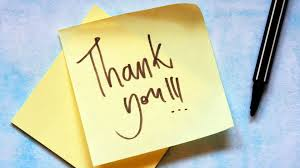